<a href="https://colab.research.google.com/github/KENE508/Customer-Churn-Analysis-and-Retention-Strategies/blob/main/Customer_Churn_Analysis_and_Retention_Strategies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
churn_data = pd.read_csv('/content/drive/My Drive/csv_folders/Telco-Customer-Churn.csv')
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
churn_data.shape      # WE HAVE 7043 CUSTOMERS IN THIS DATASET

(7043, 21)

In [ ]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
churn_data.duplicated().sum()

0

In [ ]:
churn_data["TotalCharges"] = pd.to_numeric(churn_data["TotalCharges"], errors="coerce")

In [ ]:
churn_data.astype({"TotalCharges" : "float64"})
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


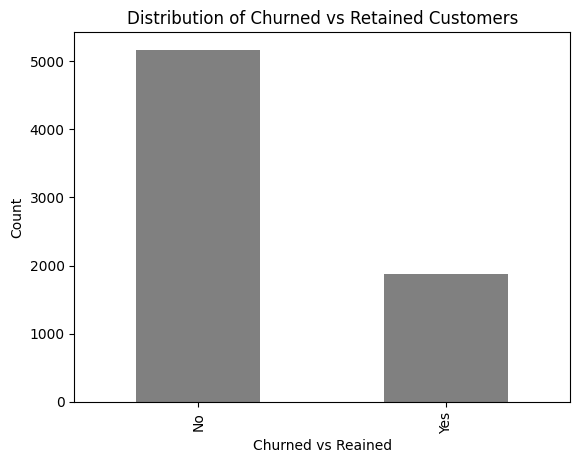

In [ ]:
churn_data["Churn"].value_counts().plot.bar(title="Distribution of Churned vs Retained Customers", ylabel="Count", xlabel="Churned vs Reained", color="grey");
# WE CAN SEE THAT ABOUT 1800 CUSTOMERS CHURNED. LET'S FIND OUT SOME OF THE FACTORS THAT CONTRIBTED TO IT USING THIS DATASET .

In [ ]:
total_customers = churn_data.shape[0]
churned_customers = churn_data[churn_data["Churn"]=="Yes"].shape[0]
percentage_churn = (churned_customers/total_customers)*100                  #A CHURN RATE OF APPROXIMATELY 26.54
percentage_churn

26.536987079369588

In [ ]:
churn_data["churn_mapped"] = churn_data["Churn"].map({"Yes": 1, "No" : 0})  #MAPPED STRINGS IN THIS COLUMN FOR EASY STATISTICS

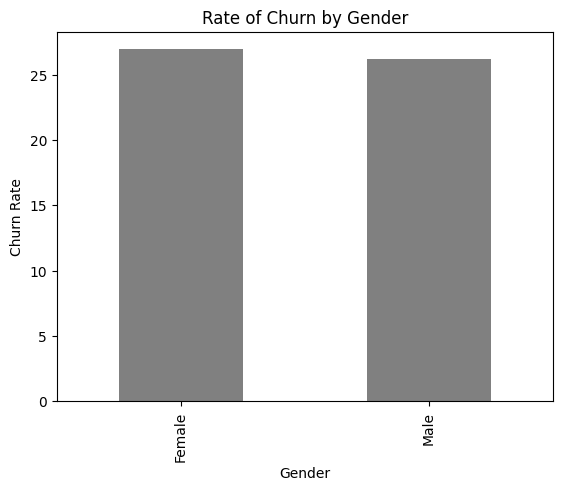

In [ ]:
gender_churn = churn_data.groupby("gender")["churn_mapped"].mean()*100
gender_churn.plot.bar(title= "Rate of Churn by Gender", ylabel= "Churn Rate", xlabel= "Gender", color="grey");
#FEMALES HAVE A HIGHER CHRN RATE THAN MALES

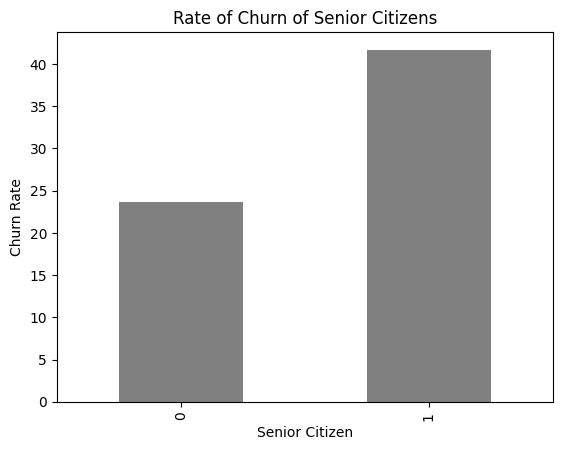

In [ ]:
senior_churn = churn_data.groupby("SeniorCitizen")["churn_mapped"].mean()*100
senior_churn.plot.bar(title = "Rate of Churn of Senior Citizens", ylabel = "Churn Rate", xlabel = "Senior Citizen", color="grey");
#SENIOR CITIZENS HAVE A HIGHER CHURN RATE THAT NONE SENIOR CITIZENS

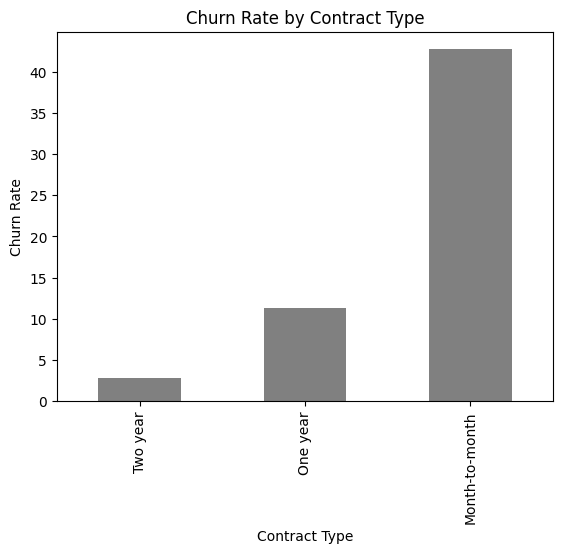

In [ ]:
contract_churn = churn_data.groupby("Contract")["churn_mapped"].mean()*100
contracts_churn = contract_churn.sort_values()
contracts_churn.plot.bar(title="Churn Rate by Contract Type", ylabel = "Churn Rate", xlabel = "Contract Type", color="grey");
#MONTH TO MONTH CONTRACT TYPE HAVE A HIGHER CHRUN RATE

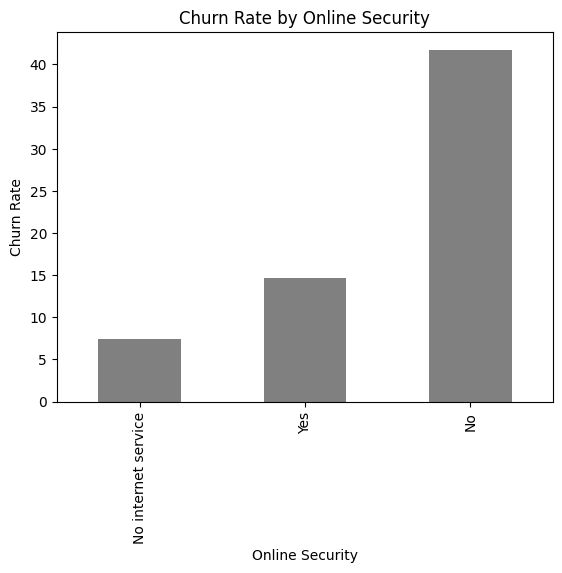

In [ ]:
online_churn = churn_data.groupby("OnlineSecurity")["churn_mapped"].mean()*100
onlinesecurity_churn = online_churn.sort_values()
onlinesecurity_churn.plot.bar(title="Churn Rate by Online Security", ylabel = "Churn Rate", xlabel = "Online Security", color= "grey");
#CUSTOMERS WITHOUT ONLINE SECURITY HAVE A HIGHER CHURN RATE

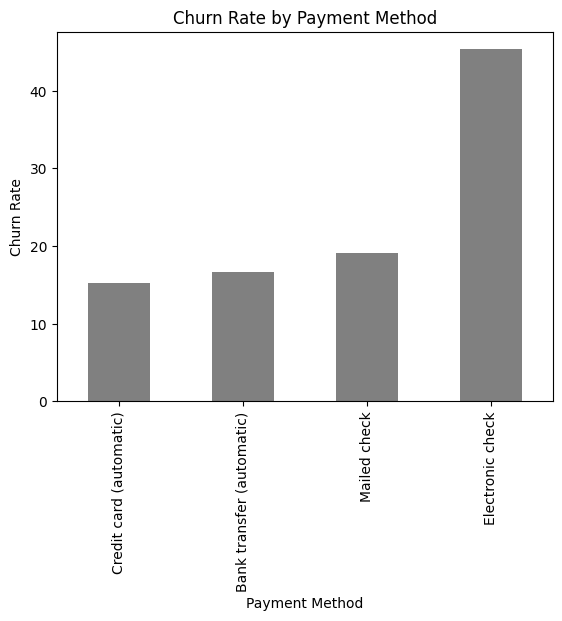

In [ ]:
pay_churn = churn_data.groupby("PaymentMethod")["churn_mapped"].mean()*100
payment_churn = pay_churn.sort_values()
payment_churn.plot.bar(title="Churn Rate by Payment Method", ylabel= "Churn Rate", xlabel="Payment Method", color="grey");
#CUSTOMERS THAT USE ELECTRONIC CHECK AS THEIR PAYMENT METHOD HAVE A HIGHER CHURN RATE

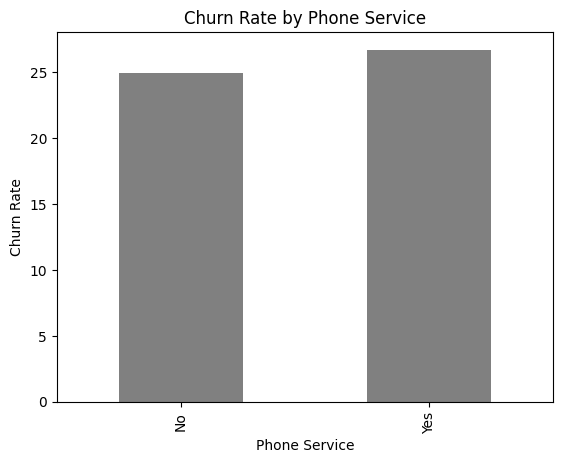

In [ ]:
phone_churn = churn_data.groupby("PhoneService")["churn_mapped"].mean()*100
phone_churn.plot.bar(title="Churn Rate by Phone Service", ylabel="Churn Rate", xlabel= "Phone Service", color="grey");
#CUSTOMERS WITH PHONE SERVICE, THOUGH SLIGHTLY HIGHER, HAVE A HIGHER CHURN RATE

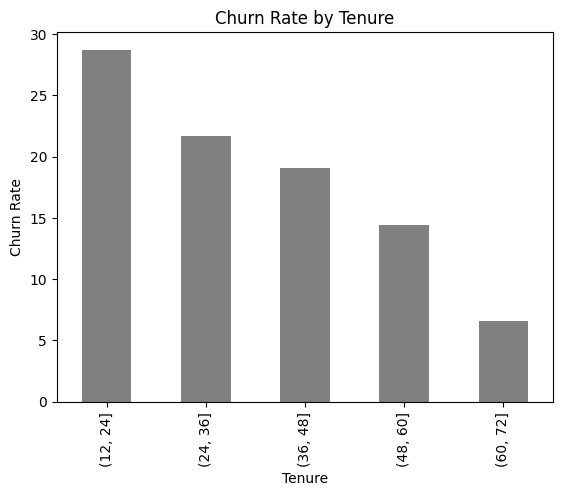

In [ ]:
tenure_churn = churn_data.groupby(pd.cut(churn_data["tenure"], bins=[12, 24, 36, 48, 60, 72]), observed=False)["churn_mapped"].mean()*100
tenure_churn.plot.bar(title="Churn Rate by Tenure", ylabel ="Churn Rate", xlabel="Tenure", color="grey");
#NEWER CUSTOMERS HAVE A HIGHER CHURN RATE

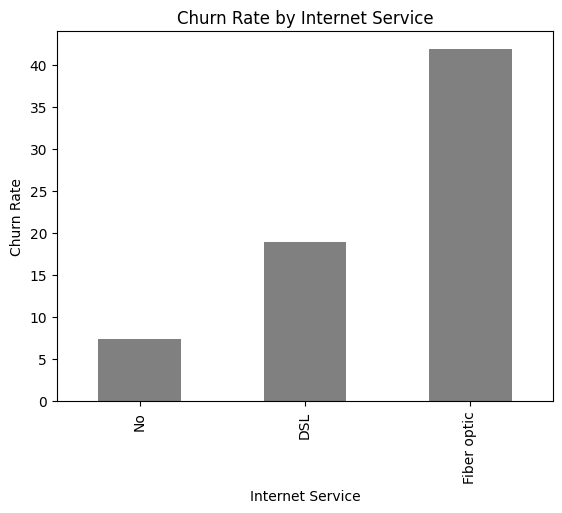

In [ ]:
internet = churn_data.groupby("InternetService")["churn_mapped"].mean()*100
internet_churn = internet.sort_values()
internet_churn.plot.bar(title="Churn Rate by Internet Service", ylabel="Churn Rate", xlabel="Internet Service", color="grey");
#CUSTOMERS THAT USE FIBRE OPTIC INTERNET SERVICE HAVE A HIGHER CHURN RATE

<Axes: >

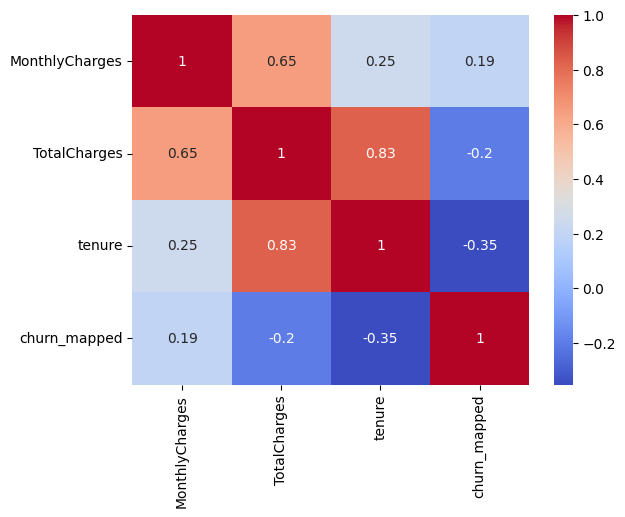

In [ ]:
num_churn = ["MonthlyCharges", "TotalCharges", "tenure"]
corr_churn = churn_data[num_churn + ["churn_mapped"]].corr()
sns.heatmap(corr_churn, annot=True, cmap="coolwarm")        # MONTHLY CHARGES (0.19), A WEAK POSITIVE CORROLATION SUGGESTS THAT AS MONTHLY CHARGES INCREASE, THERE'S A SLIGHT TENDENDENCY FOR CUSTOMERS
                                                            # TO CHURN, TOTAL CHARGES (-0.2), A WEAK NEGATIVE CORROLATION SUGGESTS THAT HIGHER TOTAL CHARGES SLIGHTLY REDUCE THE LIKELIHOOD OF CUSTOMER CHURN
                                                            # TENURE (-0.3), A NEGATIVE CORROLATION, SUGGESTS THAT CUSTOMERS THAT HAVE BEEN WITH THE COMPANY FOR LONGER ARE LESS LIKELY TO CHURN

Text(0.5, 0, 'Total Charges')

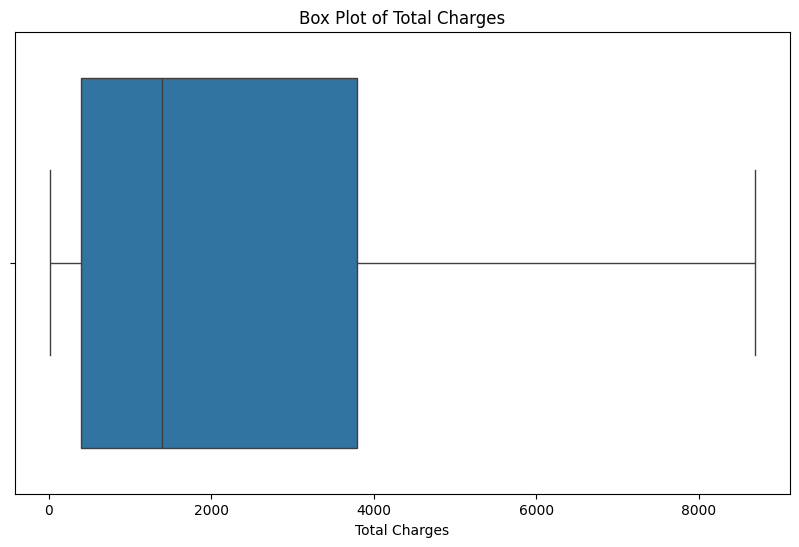

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=churn_data["TotalCharges"])
plt.title('Box Plot of ' + "Total Charges")
plt.xlabel("Total Charges")           # NO OUTLIERS ON TOTAL CHARGES

Text(0.5, 0, 'Monthly Charges')

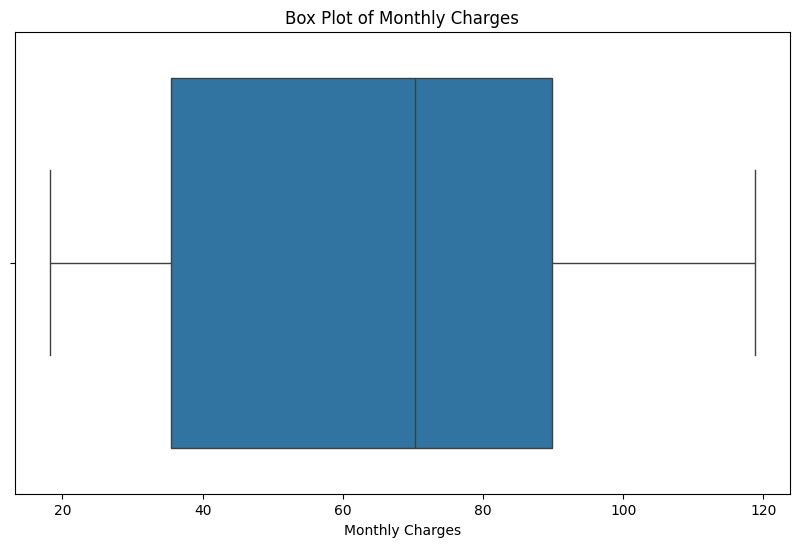

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=churn_data["MonthlyCharges"])
plt.title('Box Plot of ' + "Monthly Charges")
plt.xlabel("Monthly Charges")         #NO OUTLIERS ON MONTHLY CHARGES

Recommendations

 - Promote Long-Term Contracts: Encourage customers to opt for two-year contracts rather than month-to-month plans by offering incentives, such as discounts or additional perks. Long-term contracts tend to reduce churn by creating a sense of commitment and stability.

 - Encourage Online Security Services: Emphasize the benefits of online security features to customers, as those who subscribe to these services show higher retention rates. Offering bundled packages that include security features could make these services more appealing.

 - Promote Credit Card Payment Options: Since customers using credit card payments have the lowest churn rate, incentivize credit card use through small discounts or loyalty points, which may lead to greater retention.

 - Implement New Customer Retention Incentives: Offer discounts, loyalty rewards, or special perks to new customers to encourage long-term retention beyond the first two years. This can help retain customers during the critical early stages of their tenure.

 - Promote DSL Services for Internet Subscribers: Since DSL users show lower churn rates than fiber optic users, emphasize the reliability and affordability of DSL to new customers or to those looking to downgrade, potentially reducing churn for cost-sensitive customers.



In [ ]:
#THANK YOU FOR TAKING OUT THE TIME TO LOOK AT MY WORK, CHEERS !